<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:150%; font-family:Lobster; background-color:#C738BD; overflow:hidden"><b> GamerDNA: Analyzing Online Gaming Behavior for Enhanced Retention 🎮 </b></div>

`Author:` [Phuong Phan](https://github.com/FahadUrRehman07)\
`Date:` 14.July.2024\
`Dataset:` [🎮 Online Gaming Behavior]( https://www.kaggle.com/datasets/rabieelkharoua/predict-online-gaming-behavior-dataset)

### `INSPIRATION OF THE PROJECT`

> The vast and complex world of online gaming, with millions of players and countless gameplay scenarios, has long been a subject of interest for researchers and game developers alike. However, understanding player behavior and predicting engagement patterns remains a significant challenge, hindering the development of personalized gaming experiences and effective player retention strategies. This project embarks on a journey to develop machine learning models capable of uncovering patterns in online gaming behavior, predicting player engagement, and advancing the field of gaming analytics, ultimately enhancing the gaming experience for millions of players worldwide.


![online_gaming_behavior](https://pollinations.ai/p/online_gaming_behavior)

`Problem Statement`

> The online gaming industry is facing a significant challenge in retaining players, with millions of dollars lost annually due to poor engagement and high churn rates.

> The lack of an efficient and accurate system for predicting player engagement hinders the development of personalized gaming experiences, leading to poor player retention and revenue loss.

>  A machine learning-based approach to predicting player engagement can revolutionize the gaming industry, enabling game developers to create personalized experiences that increase player satisfaction and loyalty.

`About Dataset`
    This comprehensive dataset, comprising over 40,000 player profiles, captures the diverse online gaming behavior of players across various genres and platforms. The data was collected from various sources, including game logs, player feedback, and online forums. To ensure data quality and diversity, the dataset was preprocessed using techniques such as feature scaling, normalization, and handling missing values. This robust dataset provides an ideal foundation for developing and validating high-performance machine learning models for predicting player engagement, as part of the GamerDNA project

### `Methodology`

> **EDA**: Summarize main characteristics of the dataset. Using various visualizations techniques and statistical methods to identify patterns, outliers, and correlations. 
> 
> **Data Preprocessing**: Applying StandardScaler to the training features. Normalizing categorical labels using TF function. Then finally shuffling dataset to increase randomness and reduce the likelihood of bias in the training process. Outliers are also been considering.
> 
> **Evaluation**: Using classification report from Scikit-learn to evaluate the performance of the trained model. Graphically visualizing the performance of 14 models on the validation data.
> 
> **Hyperparameter Tuning**: Taking best hyperparameters of BayesSearchCV, YDF RandomSearchTuner as inputs. A function is then defined to re-train a model with the Random Forest & XGBoost 10K Folds backbone.
> 
> **Prediction**: Predicting player engagement levels on new, unseen player data, and identifying players at risk of churn, enabling game developers to create personalized experiences that increase player satisfaction and loyalty.

<div style="font-family: 'Bodoni Moda SC', cursive;text-align: center; background-color: #C738BD; font-size: 150%; color: white; padding: 14px; border-radius: 14px">Installing Required Libraries</div>

In [1]:
!pip install kaggle -q kaggle
!kaggle datasets download -d rabieelkharoua/predict-online-gaming-behavior-dataset

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/predict-online-gaming-behavior-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/904k [00:00<?, ?B/s]
100% 904k/904k [00:00<00:00, 13.3MB/s]


In [2]:
!unzip predict-online-gaming-behavior-dataset.zip

Archive:  predict-online-gaming-behavior-dataset.zip
  inflating: online_gaming_behavior_dataset.csv  


In [4]:
import warnings

warnings.filterwarnings('ignore')

## Data ##
import numpy as np
import pandas as pd
import os
import sys
import json
import pathlib

## Image ##
#import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import PIL
from PIL import Image


## Tensorflow ##
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, UpSampling2D,\
                                     Dropout, Flatten, Reshape, BatchNormalization, RandomFlip, RandomRotation, Rescaling, Resizing,\
                                        Input, Activation
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.applications import EfficientNetB0

from tensorflow.keras.utils import image_dataset_from_directory

## Visualization ##
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display, Javascript, Image, YouTubeVideo

from tensorflow import keras

from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import tensorflow.keras.layers as tfl
#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [5]:
!pip install -U -q ydf
import ydf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV

from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay,\
                            accuracy_score, precision_score, recall_score, f1_score
from collections import Counter

In [ ]:
import os
PATH = os.path.dirname('/content/predict-online-gaming-behavior-dataset.zip')
os.listdir(PATH)

In [ ]:
df = pd.read_csv(PATH + '/online_gaming_behavior_dataset.csv')

In [8]:
df = pd.read_csv('online_gaming_behavior_dataset.csv')

<a id='corr'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Bodoni Moda SC; background-color:#C738BD; overflow:hidden"><b> Data Content  </b></div>

In [45]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,40034.0,31.992531,10.043227,15.000000,23.000000,32.000000,41.000000,49.000000
PlayTimeHours,40034.0,12.024365,6.914638,0.000115,6.067501,12.008002,17.963831,23.999592
InGamePurchases,40034.0,0.200854,0.400644,0.000000,0.000000,0.000000,0.000000,1.000000
SessionsPerWeek,40034.0,9.471774,5.763667,0.000000,4.000000,9.000000,14.000000,19.000000
AvgSessionDurationMinutes,40034.0,94.792252,49.011375,10.000000,52.000000,95.000000,137.000000,179.000000
PlayerLevel,40034.0,49.655568,28.588379,1.000000,25.000000,49.000000,74.000000,99.000000
AchievementsUnlocked,40034.0,24.526477,14.430726,0.000000,12.000000,25.000000,37.000000,49.000000


# `Missing value analysis`

In [10]:
print(df.isnull().sum())
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.info()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases     

<a id='corr'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Bodoni Moda SC; background-color:#C738BD; overflow:hidden"><b> Exploratory Data Analysis (EDA)  </b></div>

In [49]:
print(30*"-","COLUMNS",30*"-")
display(df.columns)
print(30*"-","SHAPE",30*"-")
df.shape

------------------------------ COLUMNS ------------------------------


Index(['PlayerID', 'Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours',
       'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked',
       'EngagementLevel'],
      dtype='object')

------------------------------ SHAPE ------------------------------


(40034, 13)

In [51]:
df['EngagementLevel'].value_counts()

EngagementLevel
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64

# ` Distribution of all Variables`

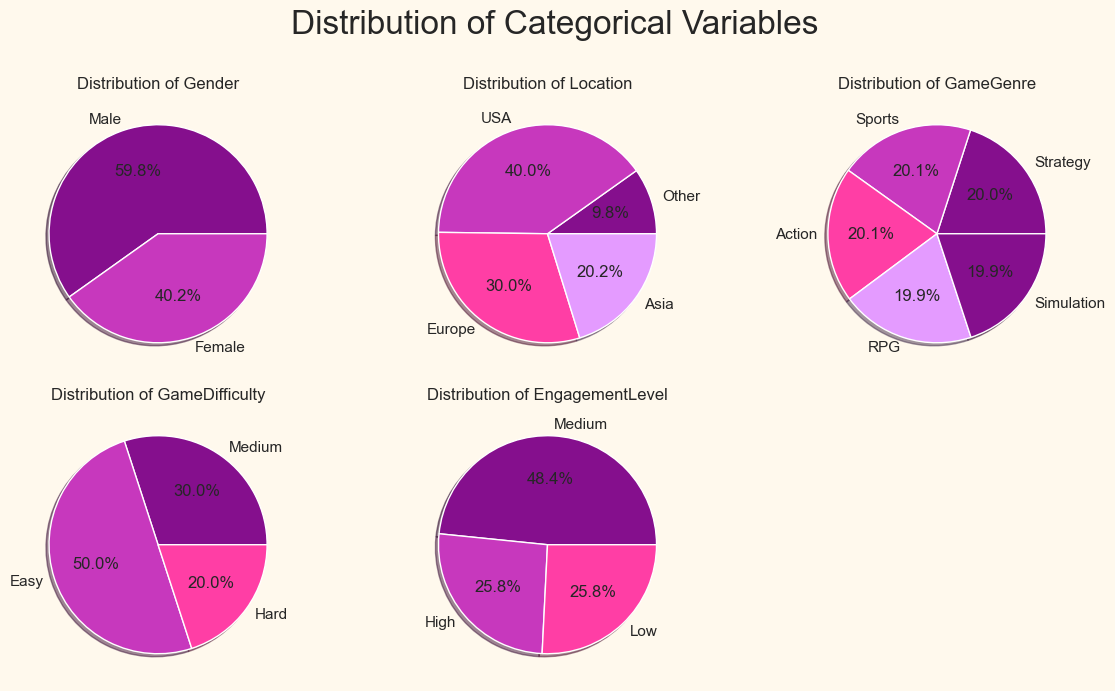

In [283]:
plt.figure(figsize=(12, 10))
plotnumber = 1

for col in cotchu:
    plt.subplot(3, 3, plotnumber)
    plt.pie(x = list(Counter(df[col]).values()), labels = list(Counter(df[col]).keys()), autopct = "%.1f%%", shadow = True, colors = palette)
    plt.title(f'Distribution of {col}')
    plotnumber += 1

plt.suptitle('Distribution of Categorical Variables', fontsize=24, y=1)
plt.tight_layout()
plt.show()

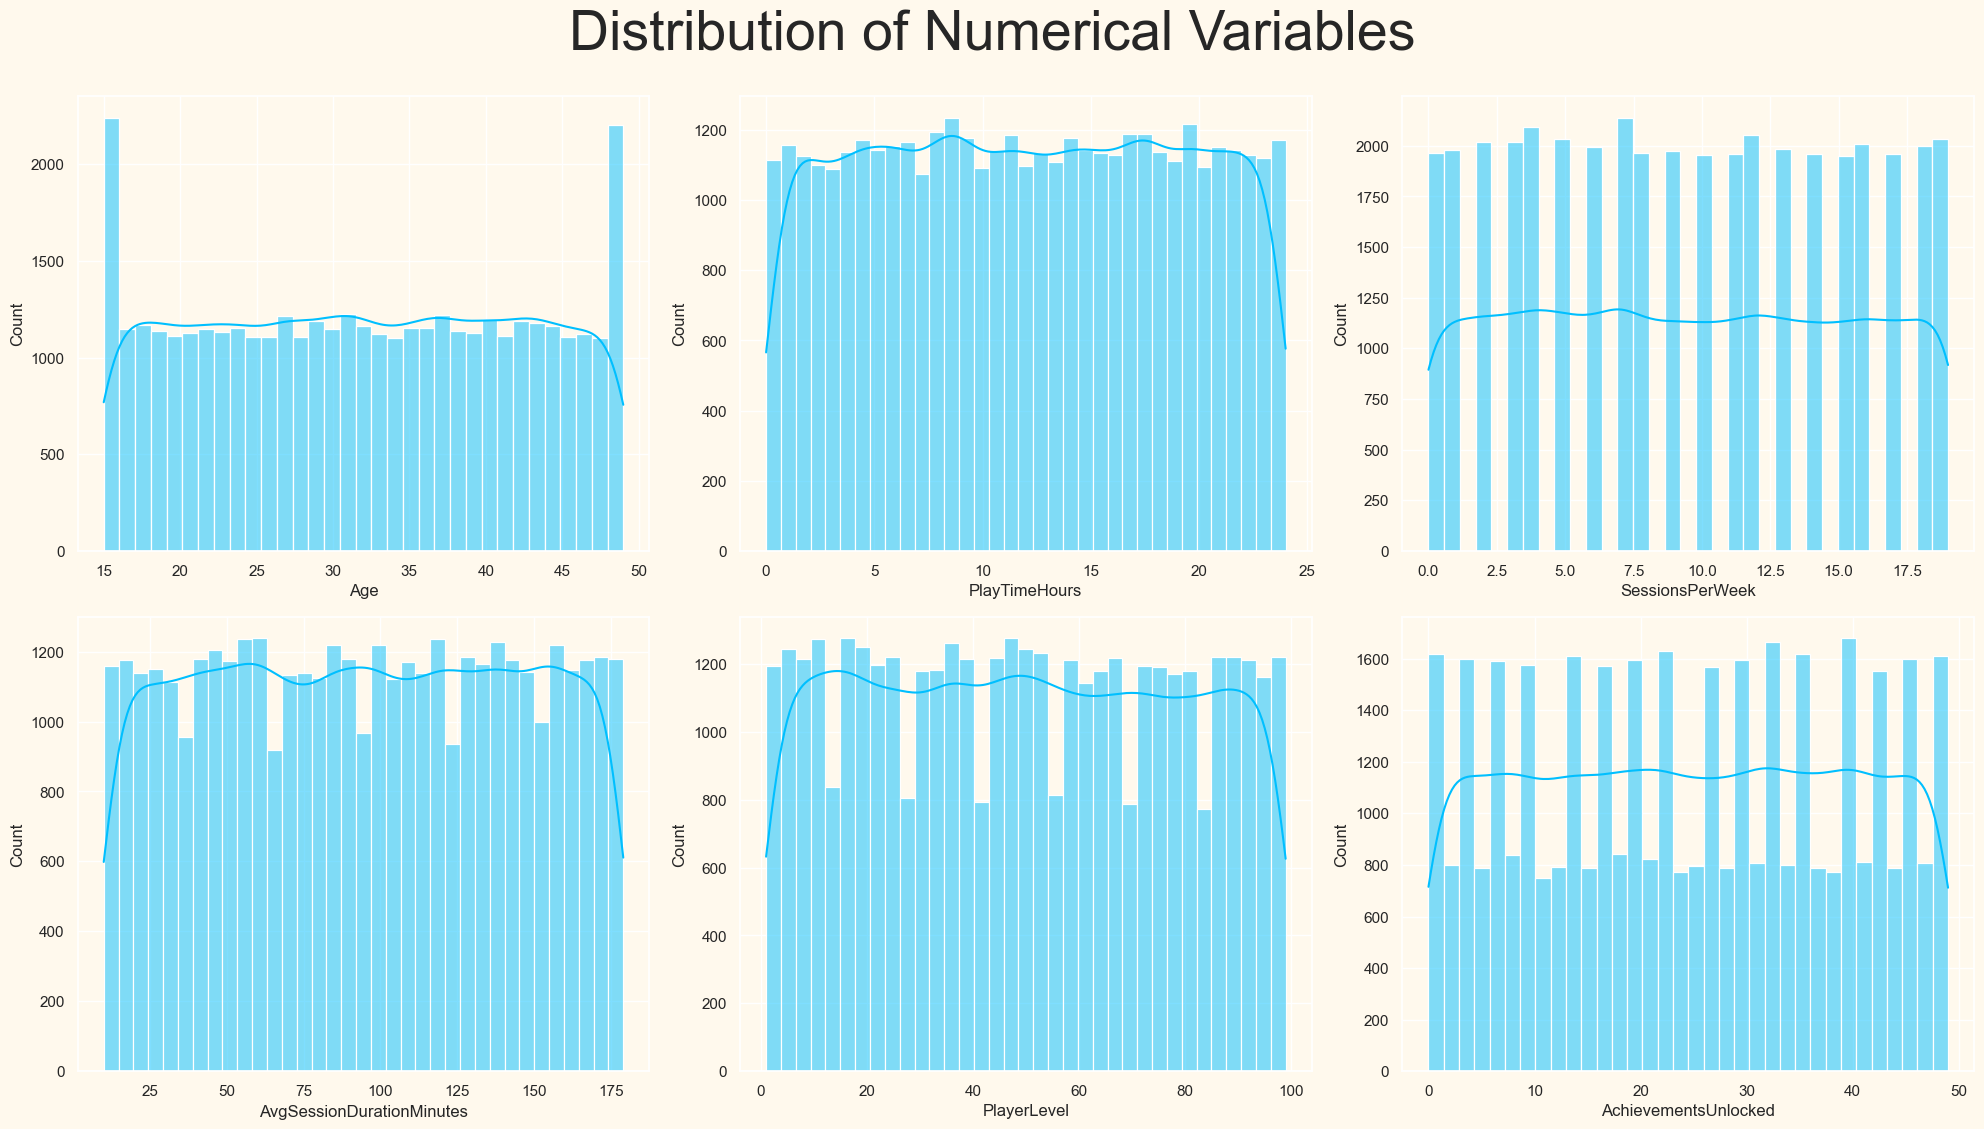

In [196]:
# Distribution of numerical columns
plt.figure(figsize=(20, 16))
plotnumber = 1

for col in df.columns:
    # Check if the number of unique values is less than 5
    if df[col].nunique() > 5:
        plt.subplot(3, 3, plotnumber)
        sns.histplot(df[col], kde=True, color='deepskyblue')
        plt.xlabel(col)

        plotnumber += 1

plt.suptitle('Distribution of Numerical Variables', fontsize=40, y=1)
plt.tight_layout()
plt.show()

# `Distribution of Target Variable`

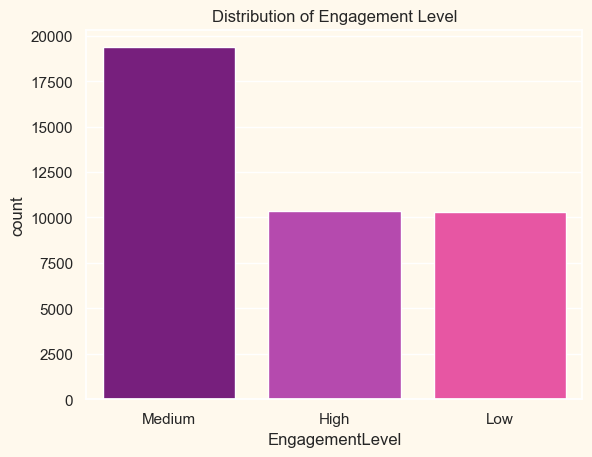

In [149]:
# Check the distribution of the target variable
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
palette = sns.color_palette('viridis')
palette = ['#850F8D', '#C738BD', '#FF3EA5', '#E49BFF']

#for p in ax.patches:
    #ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

sns.countplot(x='EngagementLevel', data=df, palette= palette)
plt.title('Distribution of Engagement Level')
plt.show()

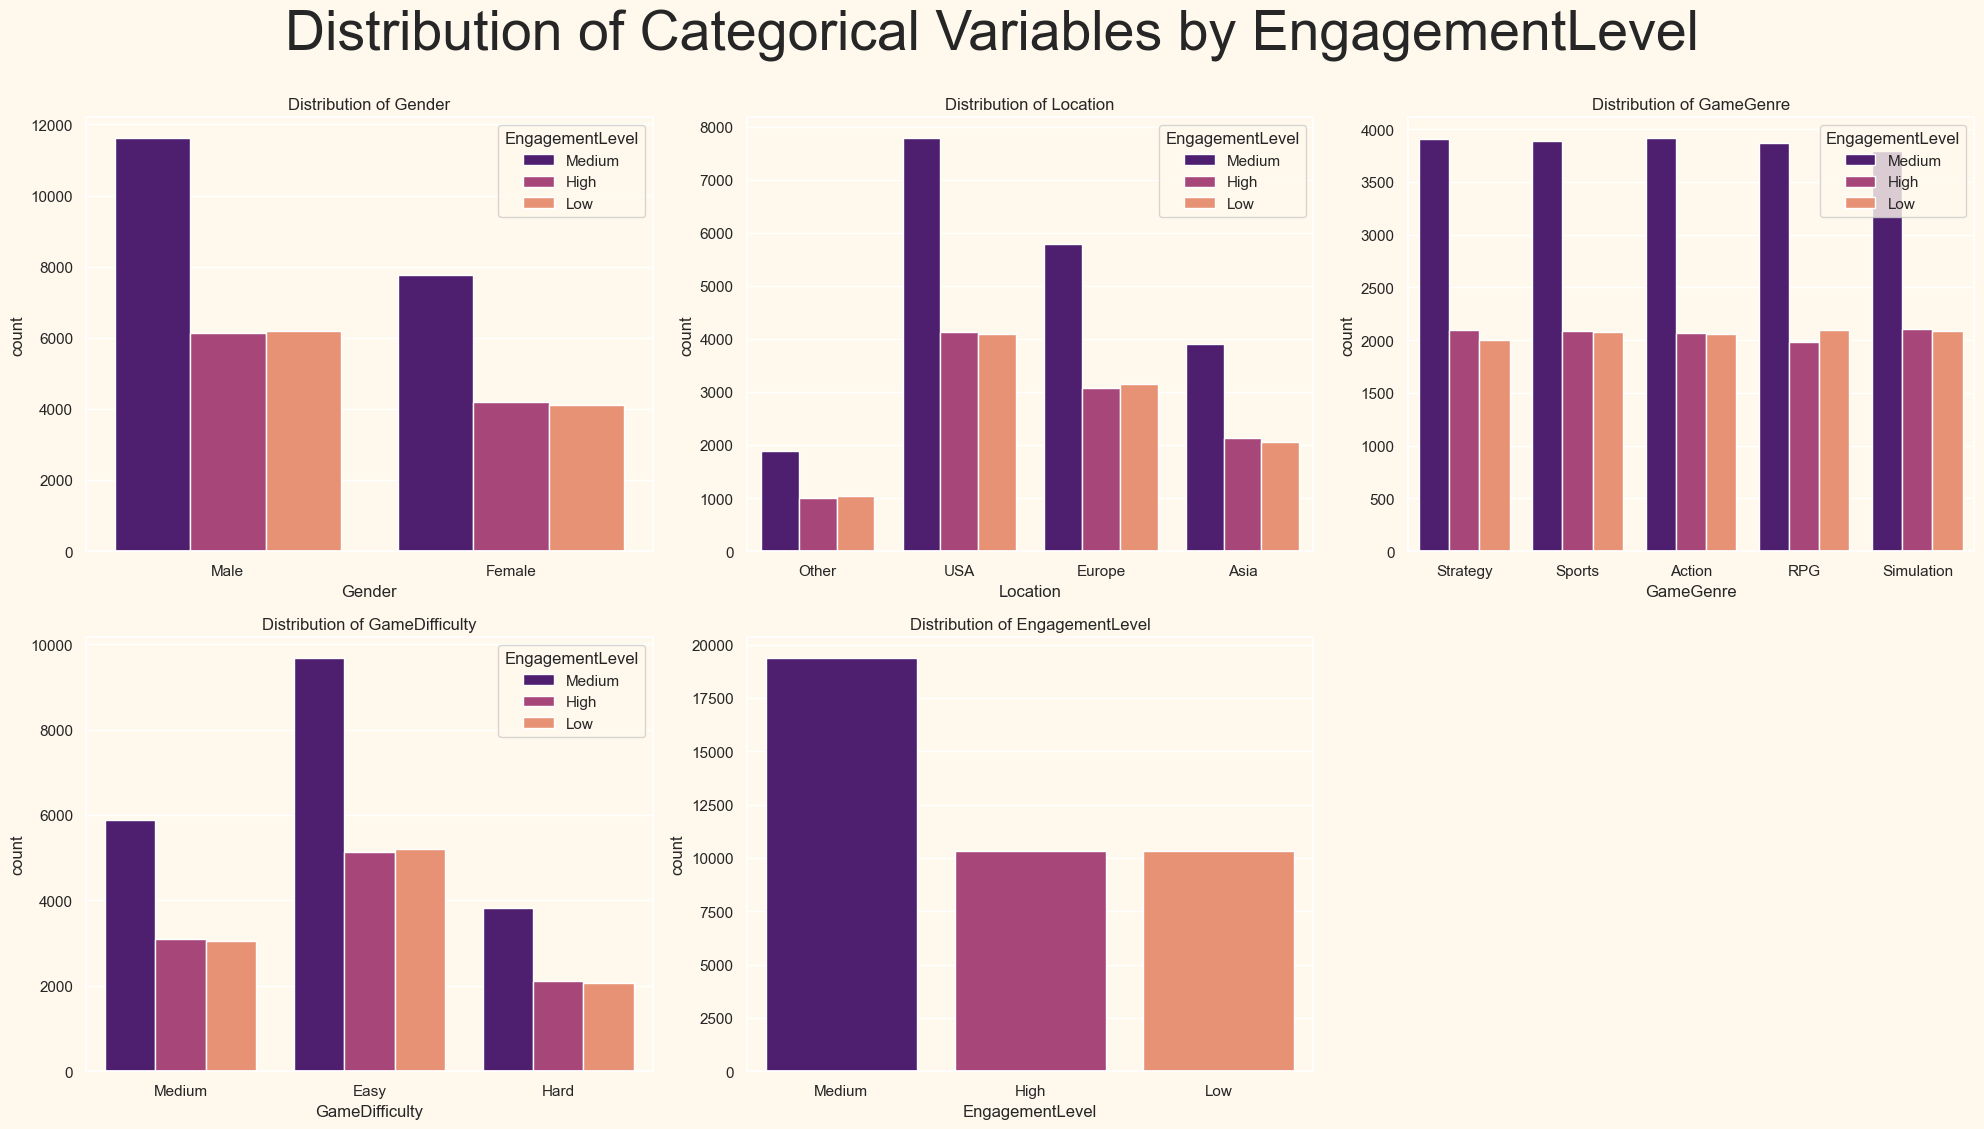

In [152]:
# Distribution of categorical columns
plt.figure(figsize=(20, 16))
plotnumber = 1

for col in cotchu:
    plt.subplot(3, 3, plotnumber)  # Create subplots for better organization
    sns.countplot(x=col, data=df, hue = df['EngagementLevel'], palette='magma')  # Create a countplot for each categorical column
    plt.title(f'Distribution of {col}')  # Set title for each subplot
    plotnumber += 1

plt.suptitle('Distribution of Categorical Variables by EngagementLevel', fontsize=40, y=1)
plt.tight_layout()
plt.show()

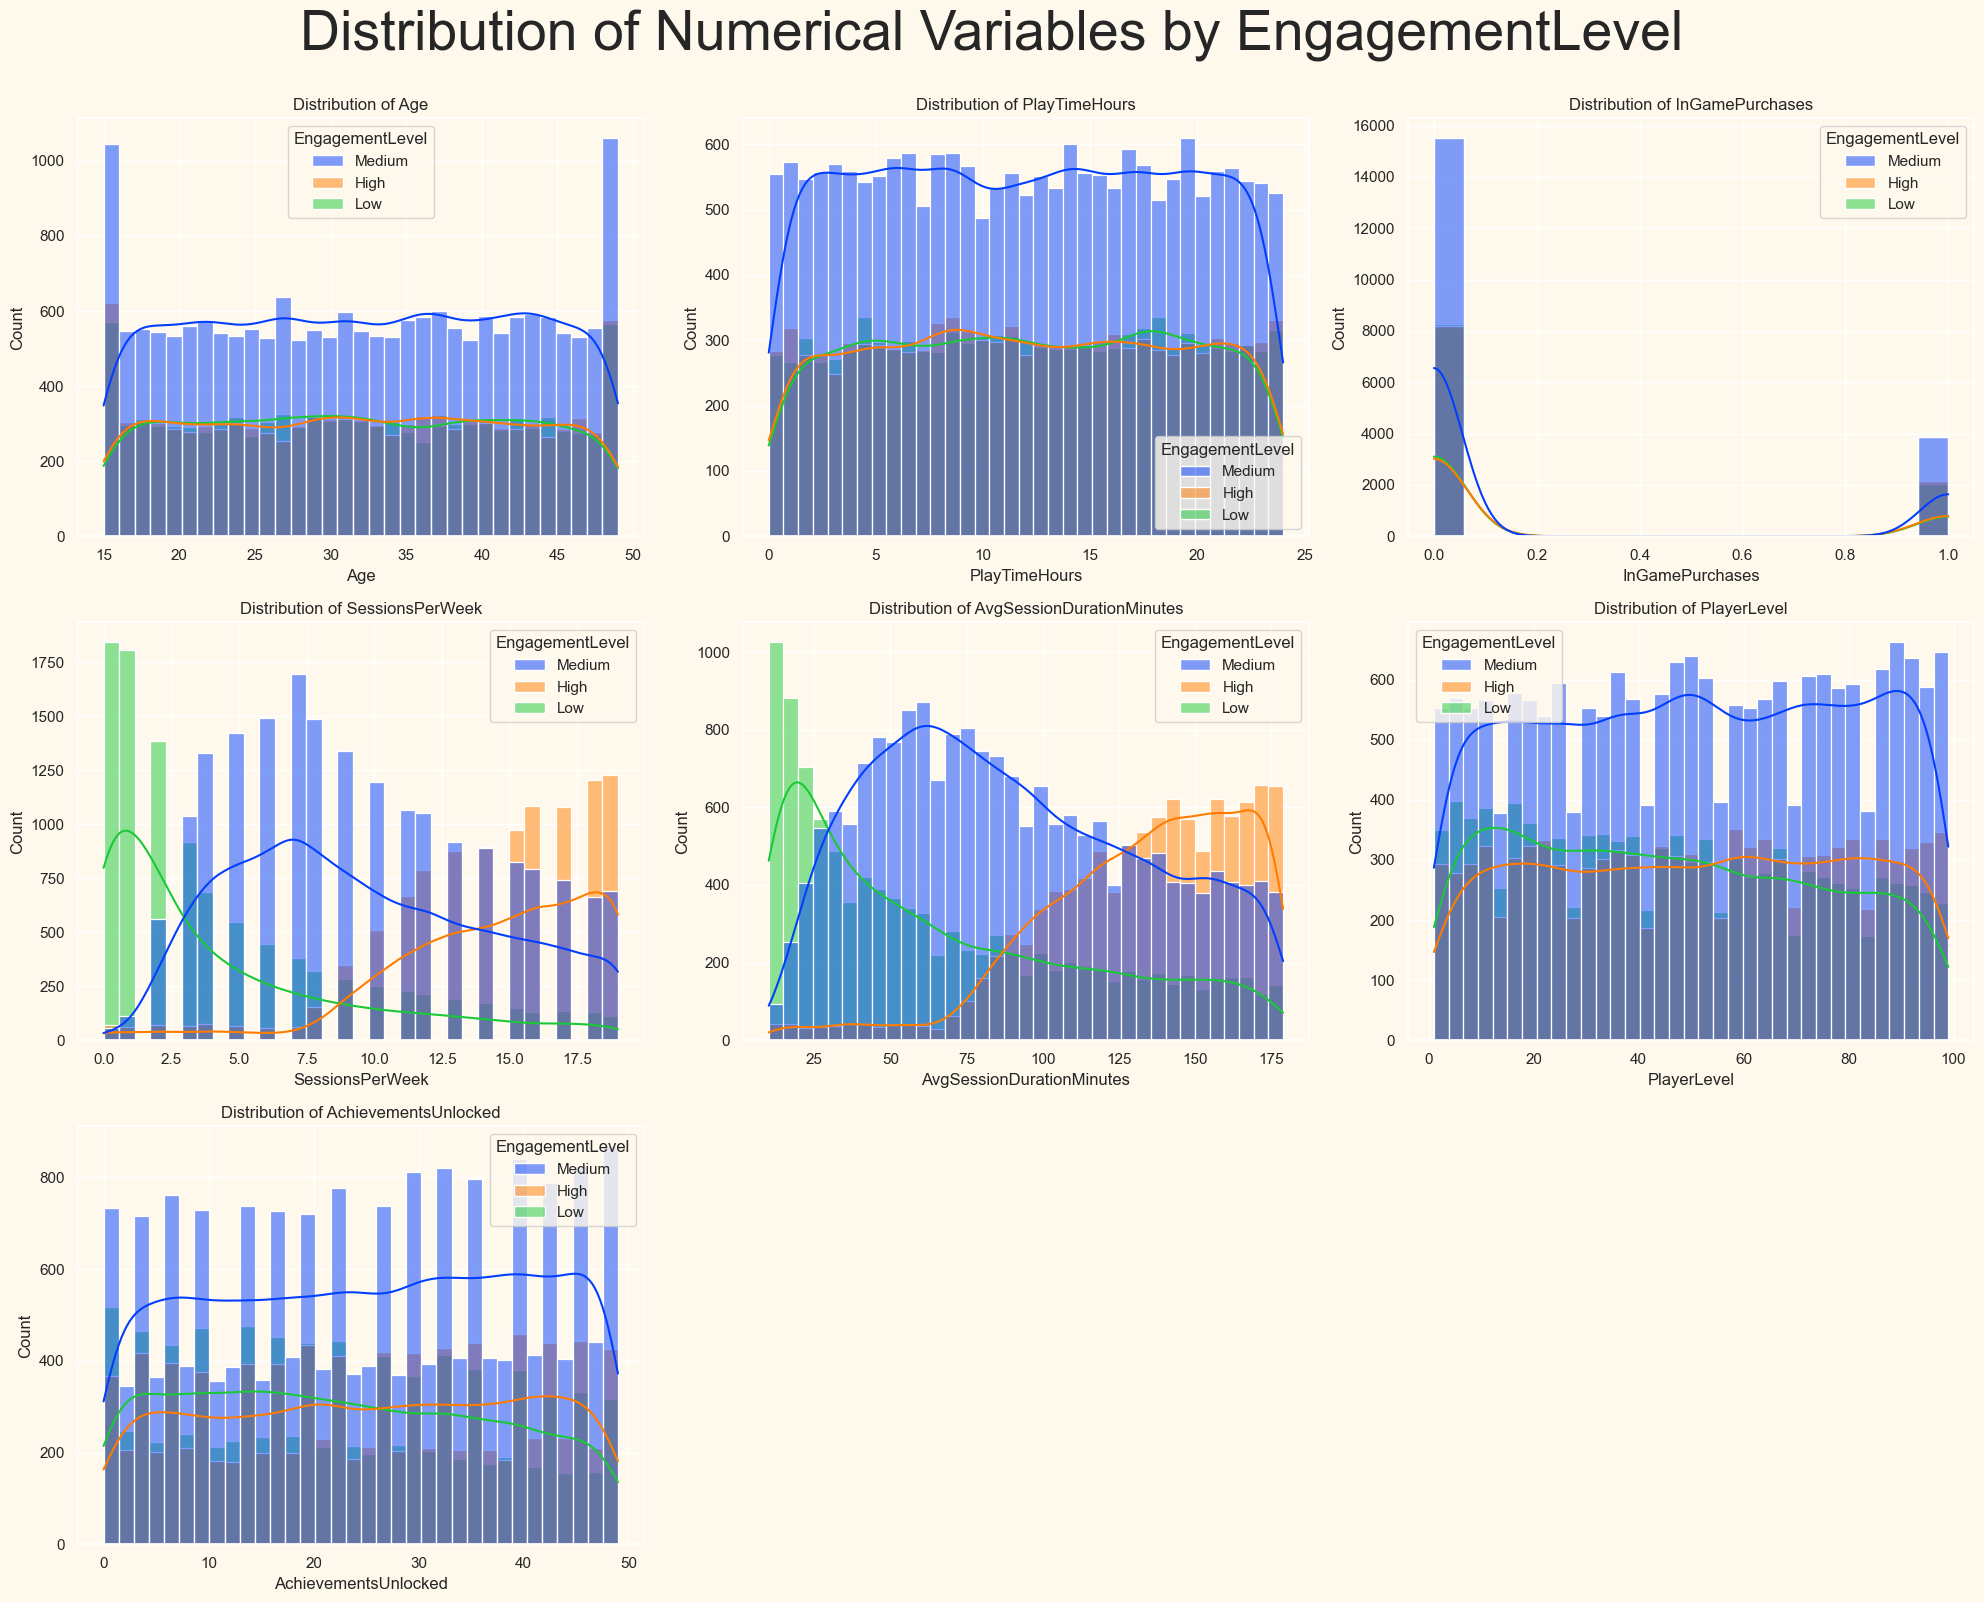

In [259]:
# Distribution of categorical columns
plt.figure(figsize=(20, 16))
plotnumber = 1

for col in cotso:
    plt.subplot(3, 3, plotnumber)  # Create subplots for better organization
    sns.histplot(x=col, kde=True, data=df, hue = df['EngagementLevel'], palette='bright')  # Create a countplot for each categorical column
    plt.title(f'Distribution of {col}')  # Set title for each subplot
    plotnumber += 1

plt.suptitle('Distribution of Numerical Variables by EngagementLevel', fontsize=40, y=1)
plt.tight_layout()
plt.show()

# `Distribution of Age`

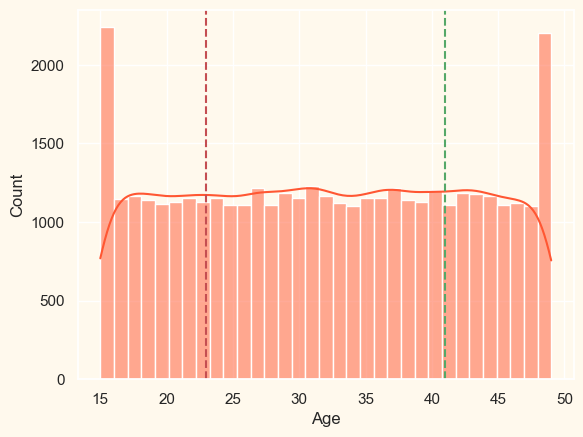

In [199]:
custom_colors = ["#FF5733", "#3366FF", "#33FF57"]

# Get the 25th and 75th quantiles of the data
quantile_25 = df['Age'].quantile(0.25)
quantile_75 = df['Age'].quantile(0.75)

sns.histplot(df['Age'], kde=True, color="#FF5733", palette=custom_colors)

# Draw lines representing the quantiles at 0.25 and 0.75
plt.axvline(x=quantile_25, color='r', linestyle='--', label='Quantile 0.25')
plt.axvline(x=quantile_75, color='g', linestyle='--', label='Quantile 0.75')

# `Distribution of Game Genre`

In [ ]:
df['GameGenre'].unique()

array(['Strategy', 'Sports', 'Action', 'RPG', 'Simulation'], dtype=object)

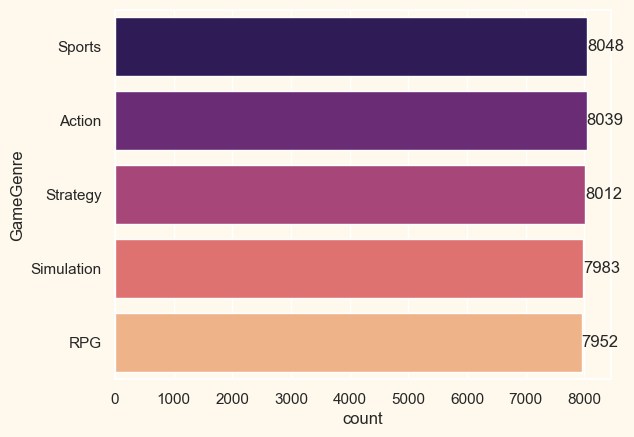

In [306]:
figure = sns.countplot(y = df['GameGenre'], order=df['GameGenre'].value_counts().index, palette = 'magma')
for contain in figure.containers :
    figure.bar_label(contain)

# `Distribution of Gender`

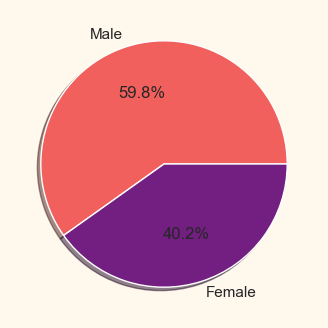

In [435]:
palette = sns.color_palette('magma_r', len(df['Gender'].unique()))
plt.figure(figsize=(4,4))
plt.pie(x = list(Counter(df['Gender']).values()), labels = list(Counter(df['Gender']).keys()), autopct = "%.1f%%", shadow = True, colors = palette)
plt.show()

# `In Game Purchases based on Location`

<Axes: xlabel='Location', ylabel='count'>

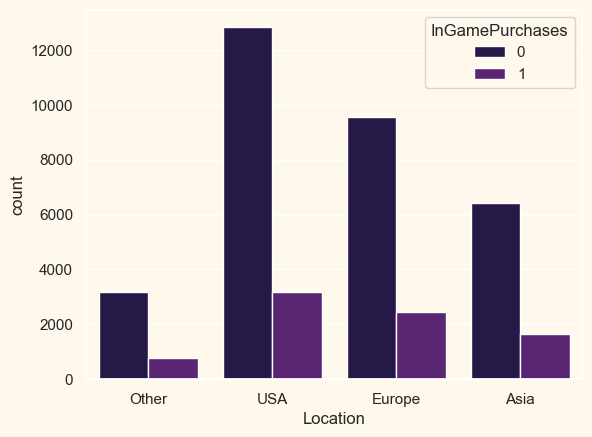

In [447]:
# count plot of cp column by sex column
sns.countplot(df, x='Location', hue= 'InGamePurchases',palette = sns.color_palette('magma'))

# `Playing time of each Engagement Level with different Game Genre `

<Axes: xlabel='EngagementLevel', ylabel='PlayTimeHours'>

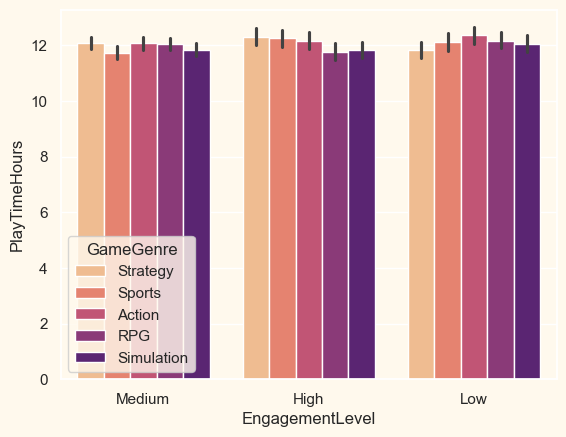

In [441]:
sns.barplot(data=df,x='EngagementLevel',y='PlayTimeHours',hue='GameGenre',palette = sns.color_palette('magma_r'))

# `Time-consumed on Game Difficulty `

<Axes: xlabel='GameGenre', ylabel='PlayTimeHours'>

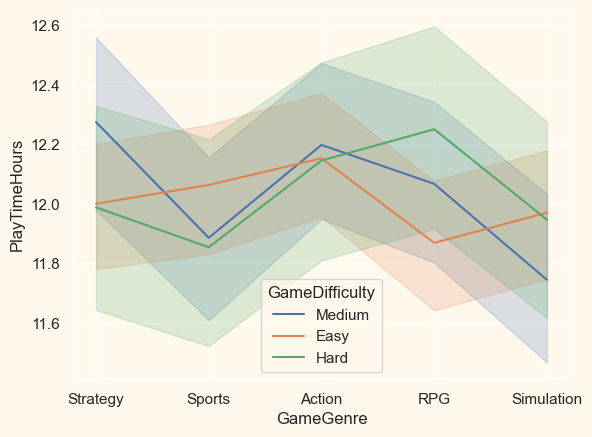

In [425]:
sns.lineplot(data=df,x='GameGenre',y='PlayTimeHours',hue='GameDifficulty')

# `Frequency Engagement Level of different Age per Week `

<Axes: xlabel='Age', ylabel='SessionsPerWeek'>

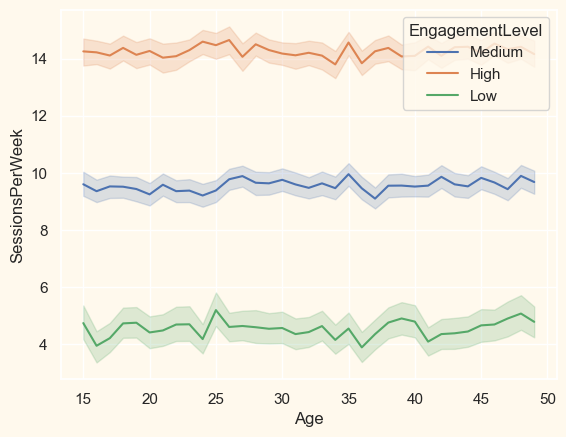

In [197]:
sns.lineplot(data=df,x='Age',y='SessionsPerWeek',hue='EngagementLevel')

# `Player index on Engagement Level `

<Axes: xlabel='Gender', ylabel='Age'>

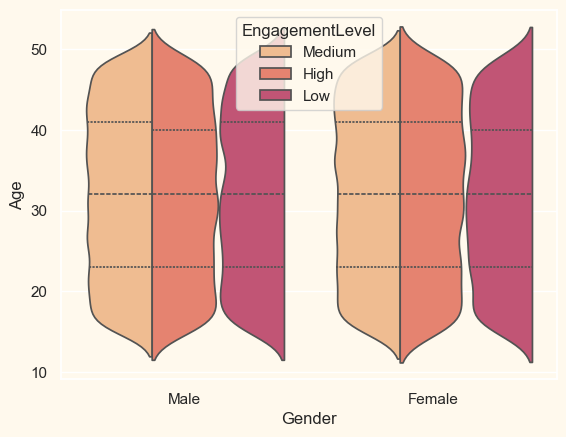

In [433]:
sns.violinplot(data=df, x="Gender", y="Age", hue="EngagementLevel",
               split=True, inner="quart", fill=True,palette = sns.color_palette('magma_r'))

<a id='corr'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Bodoni Moda SC; background-color:#C738BD; overflow:hidden"><b> Exploring Outliers  </b></div>

 Univariate analysis for Age column:
 Univariate analysis for PlayTimeHours column:
 Univariate analysis for InGamePurchases column:
 Univariate analysis for SessionsPerWeek column:
 Univariate analysis for AvgSessionDurationMinutes column:
 Univariate analysis for PlayerLevel column:
 Univariate analysis for AchievementsUnlocked column:


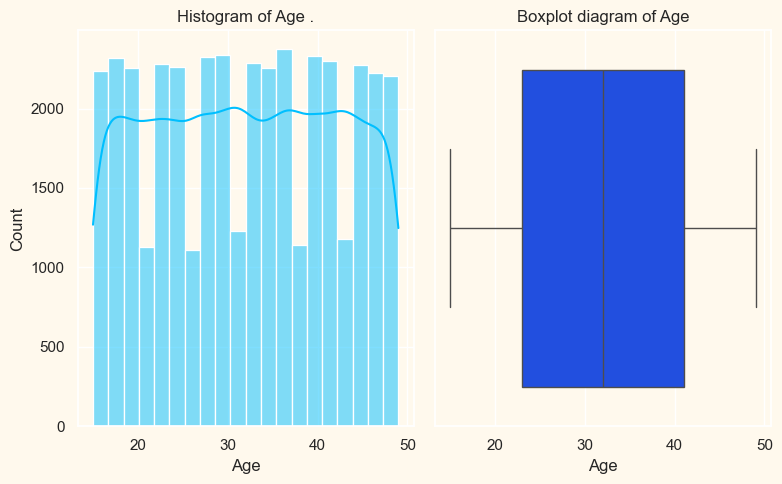

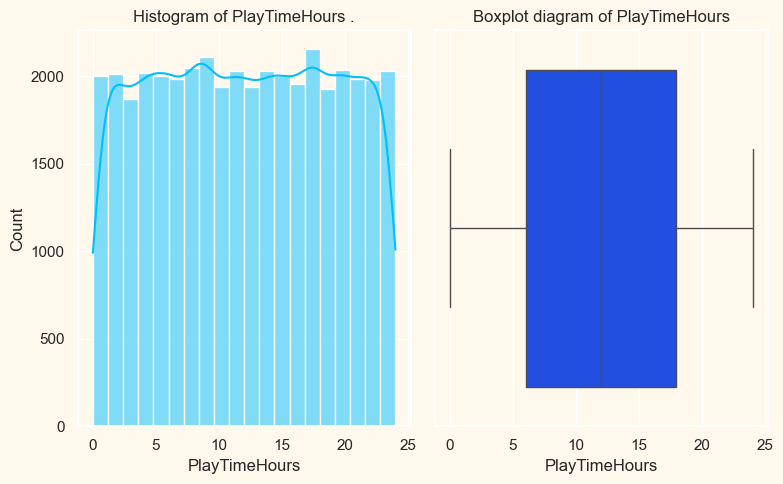

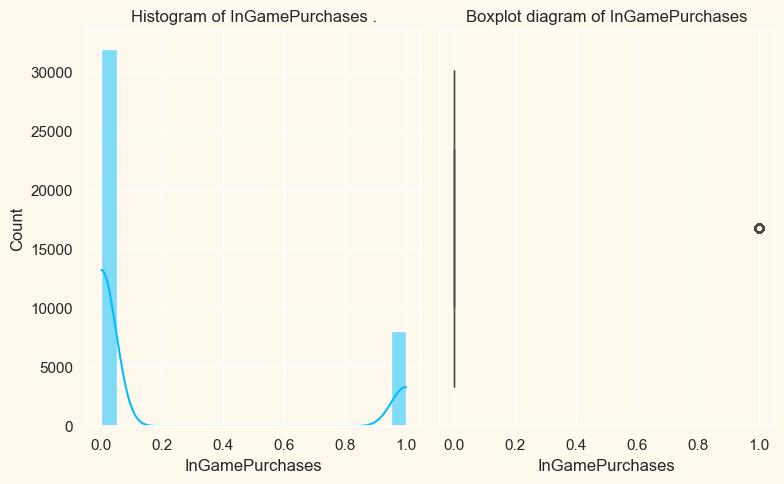

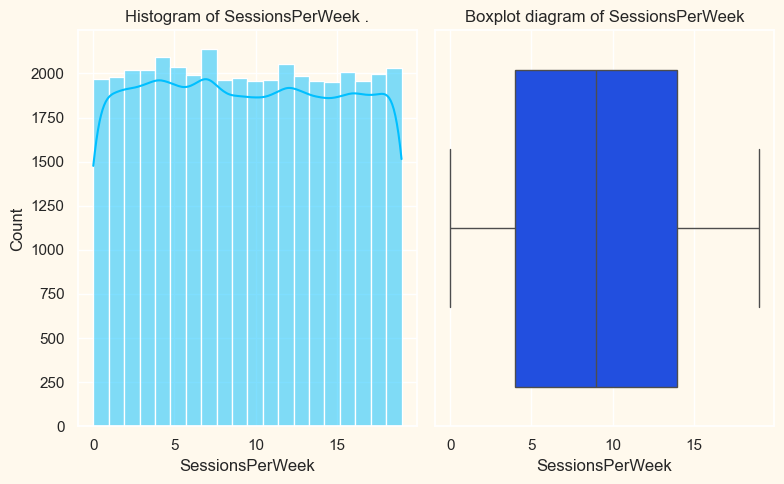

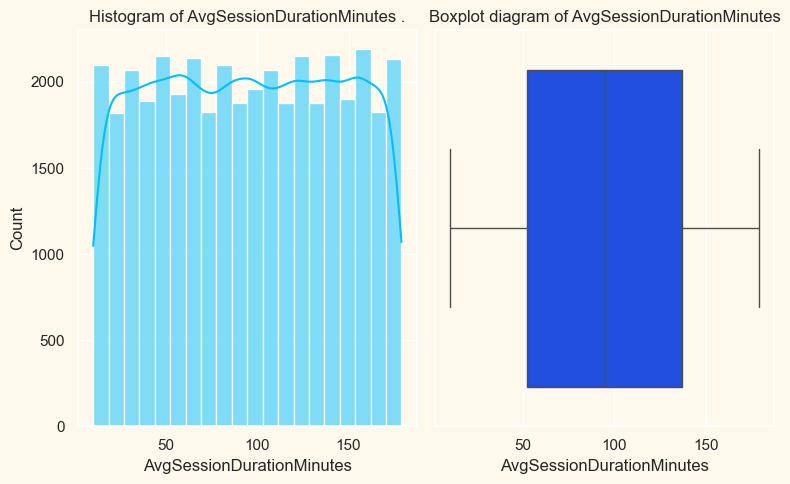

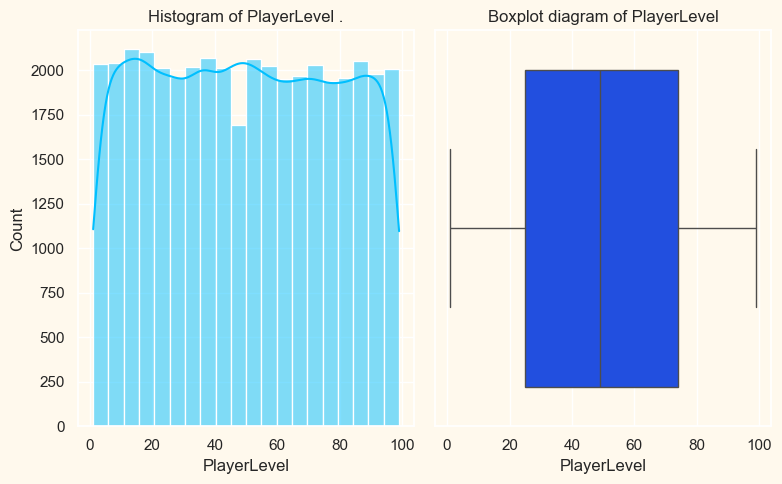

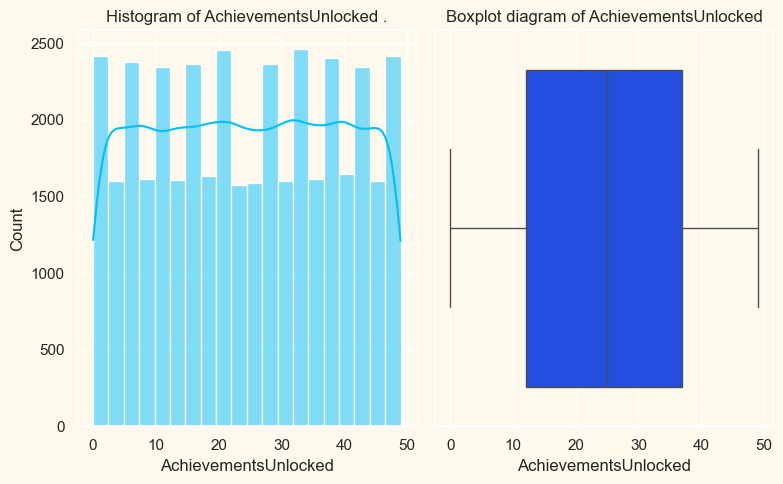

In [215]:
def univariate_analysis_numeric(col):
    fig, ax = plt.subplots(1, 2, figsize=(8,5))
    sns.histplot(df[col], kde=True, bins=20, color='deepskyblue',ax=ax[0])
    ax[0].set_title(f'Histogram of {col} .')

    sns.boxplot(x=df[col],ax=ax[1], palette = 'bright')
    ax[1].set_title(f'Boxplot diagram of {col}')

    plt.tight_layout()


for col in cotso:
    print(f' Univariate analysis for {col} column:')
    univariate_analysis_numeric(col)

<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #c77220;">
    <ul style="font-size: 22px; font-family: 'Arial'; line-height: 1.5em; ">
        <li>Clearly, there are a no outliers <strong>outliers</strong> in Numerical features. The data is symetric. </li>
    </ul>
</div>

<a id='corr'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Bodoni Moda SC; background-color:#C738BD; overflow:hidden"><b> Data Preprocessing  </b></div>

In [74]:
df = df.drop(['PlayerID'],axis = 1)

In [76]:
cotchu = df.select_dtypes(include = ['object','category']).columns
cotso = df.select_dtypes(exclude = ['object','category']).columns #cotso = data.select_dtypes(include = ['float64','int']).columns.difference(['species'])
print(cotchu,'\n',cotso)

Index(['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel'], dtype='object') 
 Index(['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked'],
      dtype='object')


In [328]:
def auto_map_categorical(df, cols):
    for col in cols:
        df[col], _ = pd.factorize(df[col])
auto_map_categorical(df, cotchu)
print(df[cotchu])

       Gender  Location  GameGenre  GameDifficulty  EngagementLevel
0           0         0          0               0                0
1           1         1          0               0                0
2           1         1          1               1                1
3           0         1          2               1                0
4           0         2          2               0                0
...       ...       ...        ...             ...              ...
40029       0         1          0               1                0
40030       1         0          4               2                1
40031       1         1          3               1                1
40032       0         1          1               0                0
40033       0         1          1               1                0

[40034 rows x 5 columns]


# `Correlation Matrix`

<Axes: title={'center': 'Feature Correlation'}>

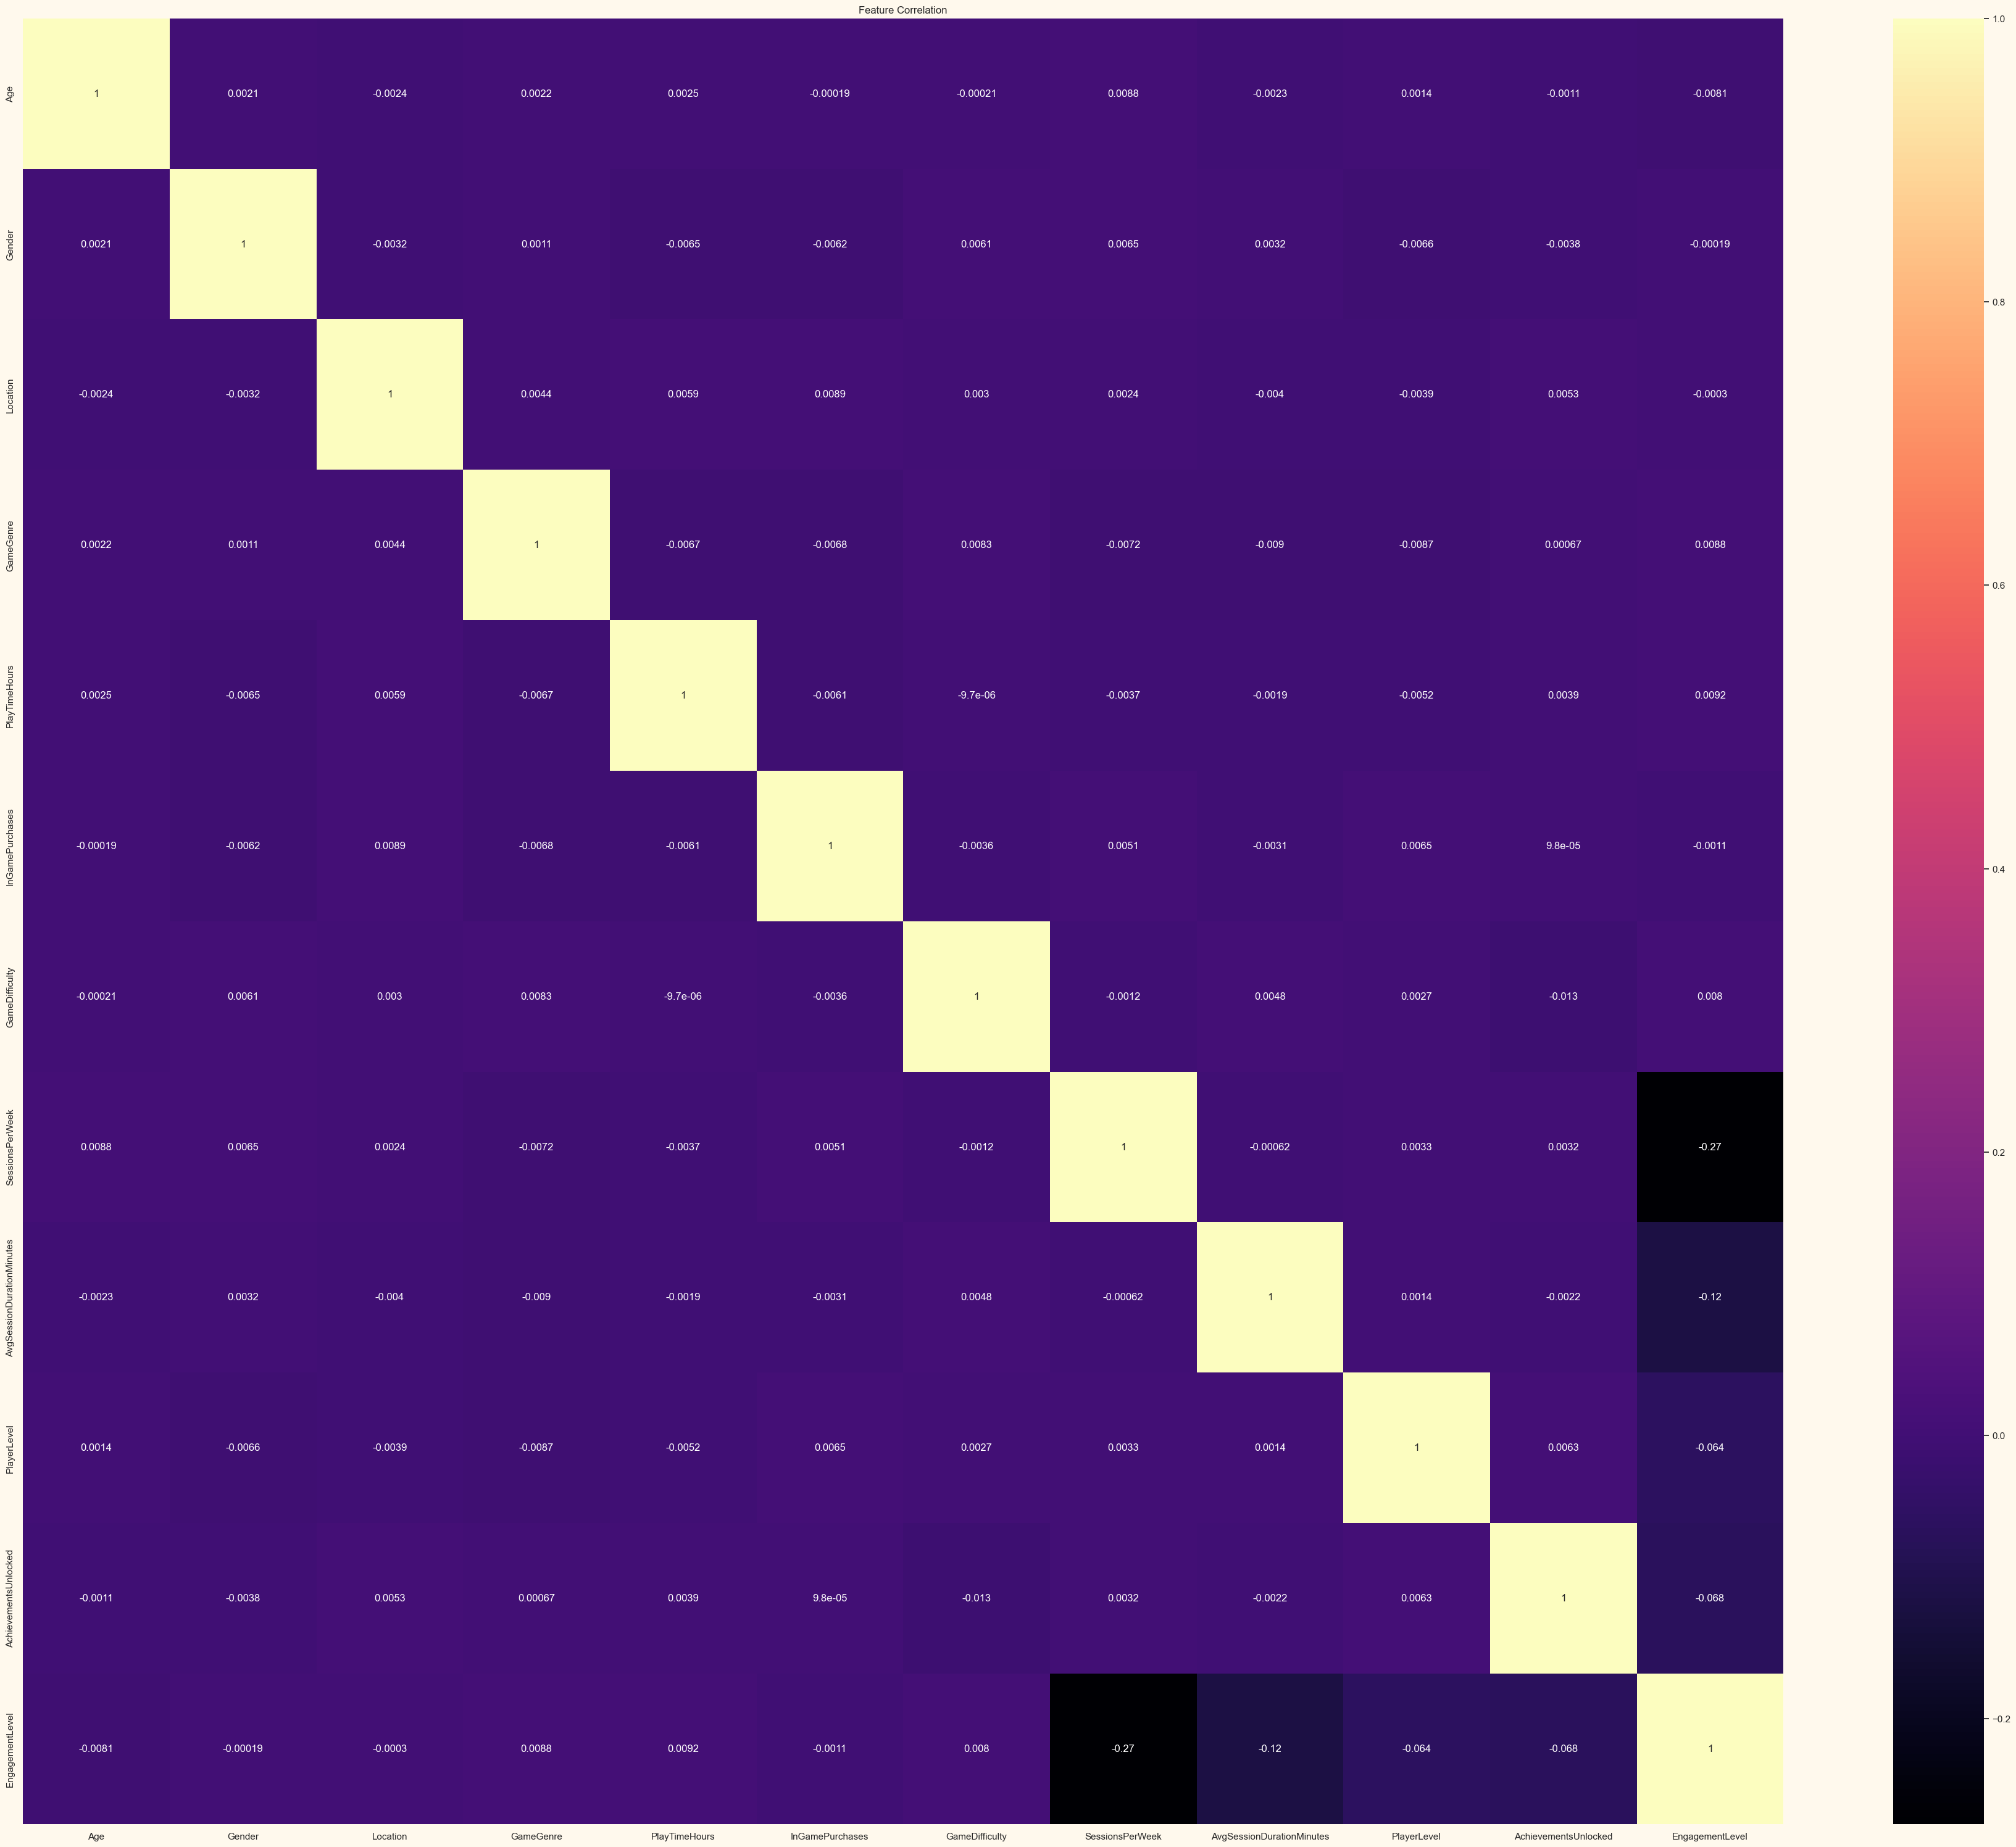

In [344]:
plt.figure(figsize=(46, 38))
plt.title('Feature Correlation')
sns.heatmap(df.corr(), annot=True, cmap='magma')

<a id='corr'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Bodoni Moda SC; background-color:#C738BD; overflow:hidden"><b> Prediction By Default Hyperparameters  </b></div>

# `Prediction Default Hyperparameters`

In [ ]:
# Using SKLearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
!pip install catboost -q
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline


# Split the data
X = df.drop('EngagementLevel', axis=1)
y = df['EngagementLevel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
preprocessor = StandardScaler()

models = [
      ('Logistic Regression', LogisticRegression()),
      ('K-Nearest Neighbors', KNeighborsClassifier()),
      ('Support Vector Machines', SVC()),
      ('Decision Tree', DecisionTreeClassifier()),
      ('Random Forest', RandomForestClassifier()),
      ('AdaBoost', AdaBoostClassifier()),
      ('Gradient Boosting', GradientBoostingClassifier()),
      ('Naive Bayes', GaussianNB()),
      ('Neural Network', MLPClassifier()),
      ('XGB', XGBClassifier()),
      ('HistGradientBoostingClassifier', HistGradientBoostingClassifier()),
      ('LGBMClassifier', LGBMClassifier()),
      ('CatBoostClassifier', CatBoostClassifier()),
      ('ExtraTreesClassifier', ExtraTreesClassifier())
      ]

results = []

for name, model in models:
    pipeline = Pipeline([
      ('prep', preprocessor),
      ('model', model)])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results.append([name, accuracy, precision, recall, f1])

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy','Precision', 'Recall', 'F1 Score'])
print(results_df)

In [ ]:
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy','Precision', 'Recall', 'F1 Score'])
print(results_df)

                             Model  Accuracy  Precision    Recall  F1 Score
0              Logistic Regression  0.820157   0.822143  0.820157  0.818758
1              K-Nearest Neighbors  0.756838   0.763804  0.756838  0.752777
2          Support Vector Machines  0.895966   0.896944  0.895966  0.895456
3                    Decision Tree  0.830648   0.830985  0.830648  0.830790
4                    Random Forest  0.911203   0.911420  0.911203  0.910868
5                         AdaBoost  0.795179   0.806202  0.795179  0.792089
6                Gradient Boosting  0.906082   0.906324  0.906082  0.905714
7                      Naive Bayes  0.841888   0.854861  0.841888  0.838924
8                   Neural Network  0.903335   0.903576  0.903335  0.902980
9                              XGB  0.911328   0.911351  0.911328  0.911083
10  HistGradientBoostingClassifier  0.914325   0.914307  0.914325  0.914121
11                  LGBMClassifier  0.916198   0.916204  0.916198  0.915974
12          

In [ ]:
 #Plot
fig = px.bar(data_frame=results_df, x='Accuracy', y='Model', color='Accuracy',
             title='Accuracy Comparison', text='Accuracy',
             width=900, height=750)
fig.show()

## `Model Evaluation`

In [ ]:
# Model Evaluation
pipeline = Pipeline([
      ('prep', preprocessor),
      ('model', XGBClassifier())
  ])

pipeline.fit(X_train, y_train)
print('XGB',pipeline.score(X_train, y_train), pipeline.score(X_test, y_test))

print('--------------------------------------------------------')

pipeline = Pipeline([
      ('prep', preprocessor),
      ('model', RandomForestClassifier())
  ])

pipeline.fit(X_train, y_train)
print('Random Forest',pipeline.score(X_train, y_train), pipeline.score(X_test, y_test))

XGB 0.9470759047054048 0.9113275883601848
--------------------------------------------------------
Random Forest 1.0 0.9099537904333708


## `Model Comparison`

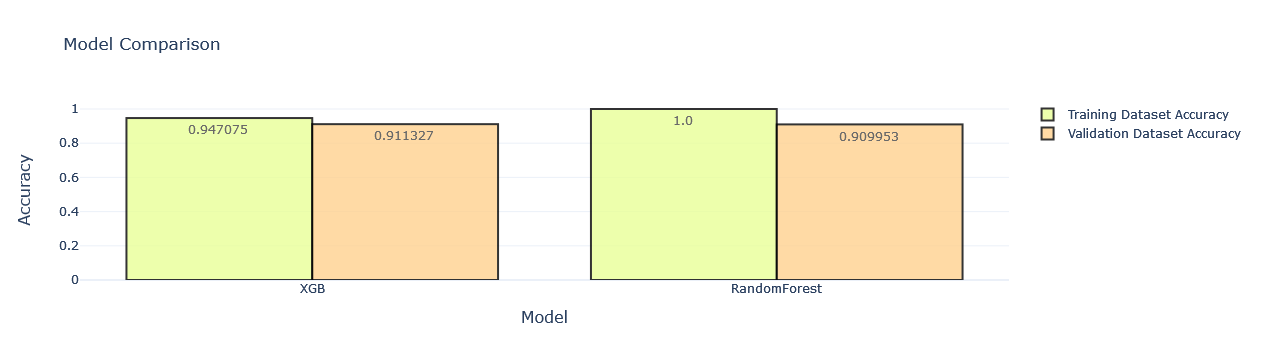

In [350]:
# Model Comparison
models = ['XGB', 'RandomForest']
training_accuracy = [0.947075, 1.0]
test_accuracy = [0.911327, 0.909953]

fig = go.Figure(data=[
    go.Bar(name='Training Dataset Accuracy',
          x=models,
          y=training_accuracy,
          text=training_accuracy,
          marker_color='#E9FF97'),
    go.Bar(name='Validation Dataset Accuracy',
          x=models,
          y=test_accuracy,
          text=test_accuracy,
          marker_color='#FFD18E'),])

fig.update_layout(
    title_text='Model Comparison',
    barmode='group',
    xaxis=dict(
        title='Model',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Accuracy',
        titlefont_size=16
    ),
    template='plotly_white')

fig.update_traces(marker_line_color='black',
                  marker_line_width=2,
                  opacity=0.8)

fig.show()

<a id='corr'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Bodoni Moda SC; background-color:#C738BD; overflow:hidden"><b> (Advanced) Hyperparameters Fine-Tuning  </b></div>

In [15]:
X = df.drop(['EngagementLevel'], axis=1)
y = df['EngagementLevel']

scaler = StandardScaler()
X = scaler.fit_transform(X)
y = to_categorical(y)

from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)   #stratify=y,shuffle=True)

In [ ]:
# Train,test split
train_df, test_df = train_test_split(df,test_size = 0.3, random_state = 42)

# Train a model
ydf.verbose(1)
tuner = ydf.RandomSearchTuner(num_trials=40, automatic_search_space=True)
learner = ydf.RandomForestLearner(label="EngagementLevel",num_trees=100, task=ydf.Task.CLASSIFICATION,
                                    tuner=tuner,)
model1 =learner.train(train_df)
model1.describe()

Train model on 28023 examples
Model trained in 3:32:48.879064


trial,score,duration,split_axis,sparse_oblique_projection_density_factor,sparse_oblique_normalization,sparse_oblique_weights,categorical_algorithm,winner_take_all,max_depth,min_examples
17,0.923991,6571,SPARSE_OBLIQUE,4,NONE,CONTINUOUS,RANDOM,true,12,1
32,0.92342,10809.5,SPARSE_OBLIQUE,4,NONE,CONTINUOUS,RANDOM,true,12,5
8,0.923313,3457.1,SPARSE_OBLIQUE,3,NONE,CONTINUOUS,CART,true,30,2
28,0.923099,9657.85,SPARSE_OBLIQUE,2,MIN_MAX,CONTINUOUS,CART,true,20,1
31,0.921886,10449.3,SPARSE_OBLIQUE,2,STANDARD_DEVIATION,BINARY,CART,true,20,1
19,0.92185,7036.01,SPARSE_OBLIQUE,1,NONE,CONTINUOUS,RANDOM,true,12,1
5,0.921779,2119.59,SPARSE_OBLIQUE,2,NONE,BINARY,CART,true,20,10
23,0.921707,8131.27,SPARSE_OBLIQUE,2,STANDARD_DEVIATION,CONTINUOUS,RANDOM,true,20,2
20,0.9216,7284.15,SPARSE_OBLIQUE,2,NONE,BINARY,CART,true,30,10
25,0.921457,8617.21,SPARSE_OBLIQUE,1,NONE,CONTINUOUS,RANDOM,true,12,2


# `Random Forest`

In [ ]:
model1.evaluate(test_df)

Label \ Pred,0,1,2
0,5544,238,239
1,132,2787,96
2,134,107,2734


In [ ]:
!pip install scikit-optimize -q
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
from skopt.space import Integer, Real


from sklearn.preprocessing import StandardScaler
preprocessor = StandardScaler()

pipeline = Pipeline([
      ('prep',preprocessor),
      ('model',RandomForestClassifier())])

parameters = {
  'n_estimators': [50, 100, 200, 300, 400, 500],
  'max_depth': [None, 5, 10, 15, 20, 30, 40, 50],
  'min_samples_split': [2, 5, 10, 15, 20],
  'min_samples_leaf': [1, 2, 5, 10],
  'max_features': ['auto','sqrt', 'log2', 0.5, 0.8],
  'criterion': ['gini', 'entropy','mae'],
  'bootstrap': [True, False, 'True_with_replacement'],
  'oob_score': [True, False, 'True_with_replacement'],
  'class_weight': ['balanced', 'balanced_subsample', None, 'balanced_error']}

model = BayesSearchCV(pipeline,parameters,cv=10,n_iter=30,scoring='accuracy',verbose=1,n_jobs=-1)
model.fit(X_train,y_train)

print(f"Train Score: {model.score(X_train,y_train)},\nTest Score: {model.score(X_test,y_test)},\nBest Score: {model.best_score_},\nBest Params: {model.best_params_}")
'''By splitting the training data into 10 folds and evaluating the model on each fold, we can get a sense of how well the model generalizes to new data.'''

# Use the best hyperparameters to train a new model
best_model = RandomForestClassifier(**model.best_params_)
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

'By splitting the training data into 10 folds and evaluating the model on each fold, we can get a sense of how well the model generalizes to new data.'

# `XGBoost`

In [ ]:
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
from skopt.space import Integer, Real

# Split the data
X = df.drop('EngagementLevel', axis=1)
y = df['EngagementLevel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.preprocessing import StandardScaler
preprocessor = StandardScaler()

pipeline = Pipeline([
      ('prep',preprocessor),
      ('model',xgb.XGBClassifier())])

parameters = {
 'model__max_depth': [3, 5, 7, 9],
 'model__learning_rate': [0.01, 0.1, 0.5, 1],
 'model__n_estimators': [50, 100, 200, 500],
 'model__gamma': [0, 0.1, 0.5, 1],
 'model__subsample': [0.5, 0.8, 1],
 'model__colsample_bytree': [0.5, 0.8, 1],
 'model__reg_alpha': [0, 0.1, 0.5, 1],
 'model__reg_lambda': [0, 0.1, 0.5, 1],
 'model__objective': ['binary:logistic', 'binary:logitraw'],
 'model__eval_metric': ['auc', 'logloss'],
 'model__booster': ['gbtree', 'gblinear'],
 'model__tree_method': ['exact', 'approx', 'hist']
}

model44 = BayesSearchCV(pipeline, parameters, cv=10, n_iter=30, scoring='accuracy', verbose=1, n_jobs=-1)
model44.fit(X_train, y_train)

print(f"Train Score: {model44.score(X_train,y_train)},\nTest Score: {model44.score(X_test,y_test)},\nBest Score: {model44.best_score_},\nBest Params: {model44.best_params_}")

best_model44 = xgb.XGBClassifier(**{k.split('__')[1]: v for k, v in model44.best_params_.items()})
best_model44.fit(X_train, y_train)

y_pred = best_model44.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

## `Model Comparison Fine-tune`

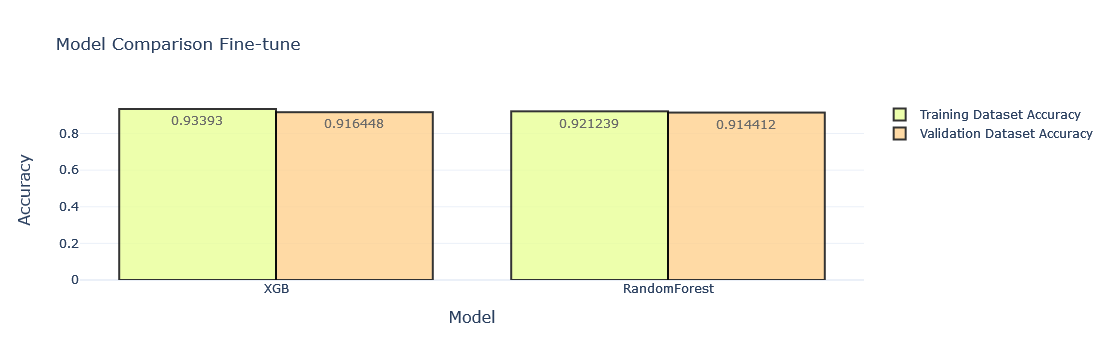

In [346]:
# Model Comparison
models = ['XGB', 'RandomForest']
training_accuracy = [0.933930, 0.921239]
test_accuracy = [0.916448, 0.914412]

fig = go.Figure(data=[
    go.Bar(name='Training Dataset Accuracy',
          x=models,
          y=training_accuracy,
          text=training_accuracy,
          marker_color='#E9FF97'),
    go.Bar(name='Validation Dataset Accuracy',
          x=models,
          y=test_accuracy,
          text=test_accuracy,
          marker_color='#FFD18E'),])

fig.update_layout(
    title_text='Model Comparison Fine-tune',
    barmode='group',
    xaxis=dict(
        title='Model',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Accuracy',
        titlefont_size=16
    ),
    template='plotly_white')

fig.update_traces(marker_line_color='black',
                  marker_line_width=2,
                  opacity=0.8)

fig.show()

<div style="display: flex; justify-content: center;">
    <img src="https://i.giphy.com/gEP2k49ndOqJDBSPZl.webp" alt="GIF">
</div>

***I hope you found it informative and engaging. If you enjoyed the content and found it helpful. Your feedback is valuable and encourages me to create more content like this in the future.***